# **1. Perkenalan Dataset**


Dataset yang akan digunakan pada projek ini adalah
**Bank Transaction Dataset for Fraud Detection**

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories *Kaggle* yang dapat dikases melalui tautan : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
   
2. **Deskripsi Dataset**:  
   Dataset ini berisi 2512 data transaksi dari berbagai akun bank. Dataset ini dapat digunakan untuk menganalisis pola transaksi dan mendeteksi aktivitas yang mencurigakan seperti penipuan (fraud)

3. **Fitur Dataset**:  
   Berikut adalah fitur yang ada pada dataset beserta penjelasannya:
   - **TransactionID**: ID unik untuk setiap transaksi (seperti nomor transaksi).
   - **AccountID**: ID unik untuk setiap akun bank. Satu akun bisa punya banyak transaksi.
   - **TransactionAmount**: Jumlah uang yang digunakan dalam transaksi (bisa kecil atau besar).
   - **TransactionDate**: Tanggal dan waktu saat transaksi terjadi.
   - **TransactionType**: Jenis transaksi, bisa Credit (pemasukan) atau Debit (pengeluaran).
   - **Location**: Kota tempat transaksi dilakukan (misalnya kota-kota di AS).
   - **DeviceID**: ID perangkat (HP, komputer, ATM) yang digunakan untuk transaksi.
   - **IP Address**: Alamat IP dari perangkat saat transaksi. Bisa berubah-ubah untuk beberapa akun.
   - **MerchantID**: ID toko atau tempat transaksi dilakukan. Bisa digunakan untuk melihat toko yang sering atau jarang digunakan oleh pengguna.
   - **AccountBalance**: Saldo akun setelah transaksi selesai.
   - **PreviousTransactionDate**: Waktu transaksi terakhir sebelum transaksi ini. Bisa digunakan untuk melihat seberapa sering seseorang bertransaksi.
   - **Channel**: Jalur transaksi, misalnya Online, ATM, atau di kantor cabang (Branch).
   - **CustomerAge**: Usia pemilik akun.
   - **CustomerOccupation**: Pekerjaan pemilik akun, seperti Dokter, Mahasiswa, Pensiunan, dll. Bisa mencerminkan pola penghasilan.
   - **TransactionDuration**: Lama transaksi berlangsung (dalam detik).
   - **LoginAttempts**: Berapa kali percobaan login dilakukan sebelum transaksi. Kalau jumlahnya tinggi, bisa jadi ada aktivitas mencurigakan.

# **2. Import Library**

Pada tahap ini dilakukan import beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, memuat dataset ke dalam notebook.
Dataset dimuat dengan menggunakan pustaka pandas untuk membaca dataset berformat csv yang sebelumnya telah diupload ke github menggunakan fungsi `read_csv()`.
Setelah dataset berhasil dimuat dan disimpan kedalam dataframe, selanjutnya ditampilkan 5 baris data pertama menggunakan fungsi `head()`.

In [ ]:
bank_transaction_df = pd.read_csv("https://raw.githubusercontent.com/DumaSitorus/MLBP-project/refs/heads/main/bank-transaction-dataset/bank_transactions_data_2.csv")
bank_transaction_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
bank_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Dari hasil diatas terlihat bahwa tidak ada baris data yang memiliki nilai nill, sehingga tidak perlu melakukan penanganan missing value.

In [ ]:
print(f"Jumlah baris duplikasi: {bank_transaction_df.duplicated().sum()}")

Jumlah baris duplikasi: 0


Dari hasil diatas terlihat bahwa tidak ada baris data yang duplikat, sehingga tidak perlu melakukan penanganan duplicate value.

In [ ]:
bank_transaction_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Pada hasil diatas terlihat bahwa setiap nilai pada fitur numerik memiliki nilai yang tampak normal kecuali pada kolom TransactionAmmount dimana nilai maksimal memiliki rentang yang amat jauh dari quartil ketiga. Hal ini menunjukkan terdapat data oulier pada fitur tersebut. Selain itu terdapat LoginAttemp yang memiliki nilai maksimum yang jauh dari data pada quarter ketiganya. Akan tetapi hal ini tergolong wajar karena ini dapat menjadi pola yang menunjukkan terjadinya fraud dari jumlah login pengguna misalnya menggunakan brute force saat mencoba login.

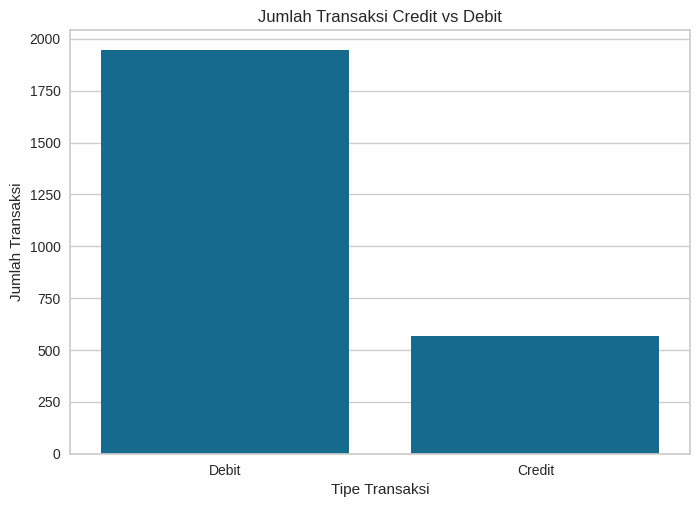

In [ ]:
transaction_counts = bank_transaction_df['TransactionType'].value_counts()

sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Jumlah Transaksi Credit vs Debit')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

Kode tersebut menghasilkan jumlah transaksi berdasarkan jenis transaksi yang dilakukan pengguna.
Transaksi menggunakan Debit memiliki jumlah yang jauh lebih banyak dari pada Credit.

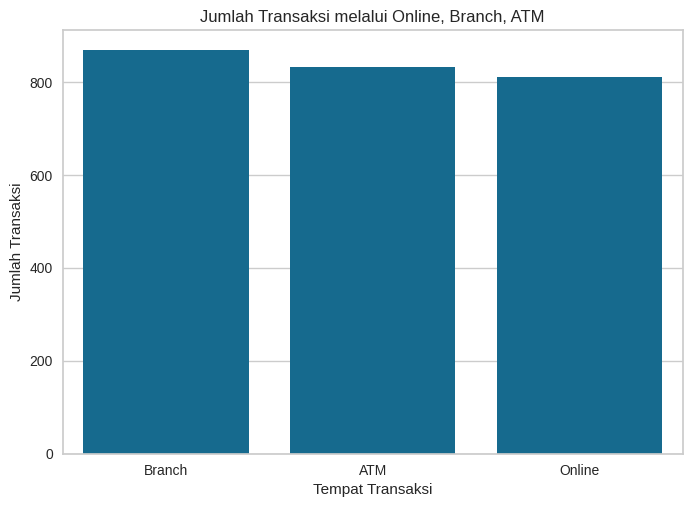

In [ ]:
transaction_counts = bank_transaction_df['Channel'].value_counts()

sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Jumlah Transaksi melalui Online, Branch, ATM')
plt.xlabel('Tempat Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

Kode tersebut memberikan visualisasi jumlah transasi berdasarkan kanal yang digunakan untuk melakukan transaksi. Perbedaan penggunaan kanal tidak begitu berbeda. Jumlah transaksi terbanyak dilakukan melalui Cabang dan yang paling sedikit dilakukan melalui Online.

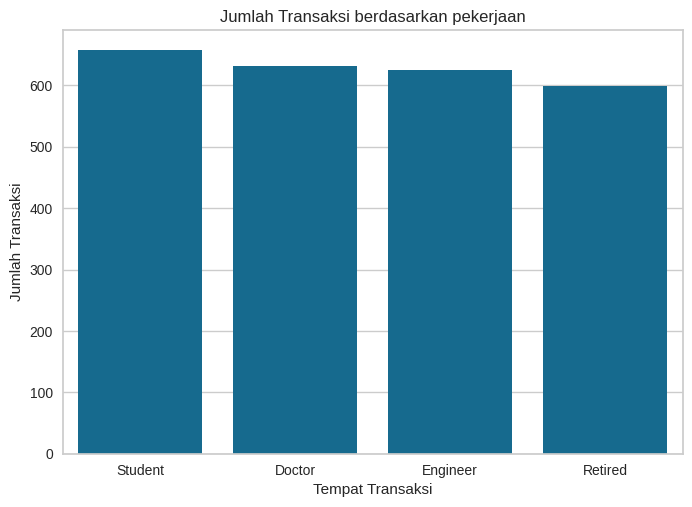

In [ ]:
transaction_counts = bank_transaction_df['CustomerOccupation'].value_counts()

sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Jumlah Transaksi berdasarkan pekerjaan')
plt.xlabel('Tempat Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

Kode tersebut memberikan visualisasijumlah transaski berdasarkan pekerjaan pengguna. Pekerjaan yang paling sering melakukan transaksi adalah pelajar, diikuti dengan doctor, lalu teknisi, dan yang telah pensiun.

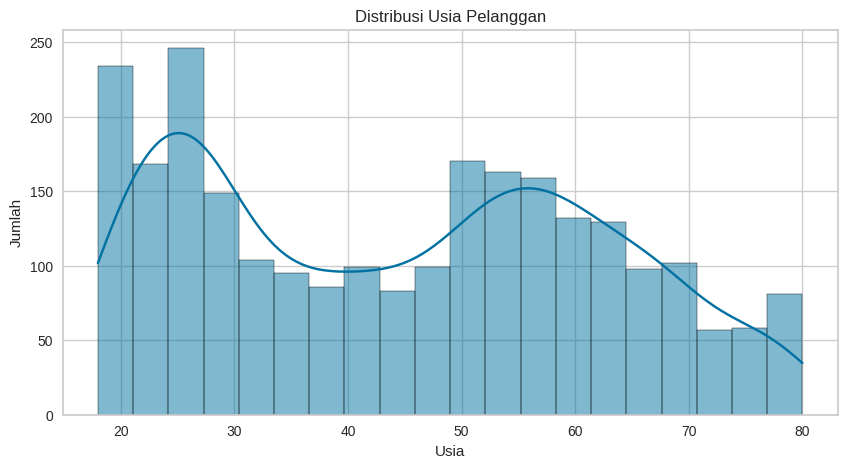

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(bank_transaction_df['CustomerAge'], bins=20, kde=True)
plt.title("Distribusi Usia Pelanggan")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

Kode tersebut menghasilkan visualisasi yang menunjukkan jumlah transaksi berdasarkan usia pengguna. Terlihat bahwa usia yang paling sering melakukan transasi adalah pada rentang 18-30 dan 50-60 tahun.

In [ ]:
# Rata-rata durasi transaksi berdasarkan jenis transaksi
pivot_duration_by_type = bank_transaction_df.pivot_table(
    values='TransactionDuration',
    index='TransactionType',
    aggfunc=['mean','min', 'max']
)

print(pivot_duration_by_type)

                               mean                 min                 max
                TransactionDuration TransactionDuration TransactionDuration
TransactionType                                                            
Credit                   119.394366                  10                 294
Debit                    119.716049                  10                 300


Kode tersebut akan menghasilkan tabel pivot yang menunjukkan durasi transaski berdasarkan jenis transaksi yang dilakukan. Transaksi jenis credit dan debit memiliki rata-rata, minimal, dan maksimal waktu durasi yang hampir sama.

In [ ]:
# Rata-rata durasi transaksi berdasarkan kanal transaksi
pivot_duration_by_channel = bank_transaction_df.pivot_table(
    values='TransactionDuration',
    index='Channel',
    aggfunc=['mean','min', 'max']
)

print(pivot_duration_by_channel)

                       mean                 min                 max
        TransactionDuration TransactionDuration TransactionDuration
Channel                                                            
ATM              122.091236                  11                 300
Branch           116.675115                  10                 298
Online           120.305795                  10                 300


Kode tersebut akan menghasilkan tabel pivot yang menunjukan durasi transaksi berdasarkan kanal yang digunakan untuk melakukan transaksi. Transaksi secara melalui ATM dan secara Online memiliki durasi yang lebih lama dibandingkan dengan transaksi melalui cabang.

In [ ]:
# Rata-rata durasi transaksi berdasarkan jumlah percobaan login
pivot_duration_by_login_attemp = bank_transaction_df.pivot_table(
    values='TransactionDuration',
    index='LoginAttempts',
    aggfunc=['mean','min', 'max']
)

print(pivot_duration_by_login_attemp)

                             mean                 min                 max
              TransactionDuration TransactionDuration TransactionDuration
LoginAttempts                                                            
1                      119.128033                  10                 300
2                      122.185185                  19                 280
3                      129.032258                  13                 286
4                      140.968750                  11                 291
5                      125.562500                  22                 283


Kode tersebut akan menghasilkan tabel pivot yang menunjukan durasi transaksi berdasarkan jumlah login yang dilakukan pengguna sebelum melakukan transaksi. Jumlah login yang memiliki transaksi dengan durasi tercepat adalah dengan 1 kali melakukan percobaan login. sedangkan dengan menggunakan percobaan login berkali-kali memiliki durasi yang lebih lama.

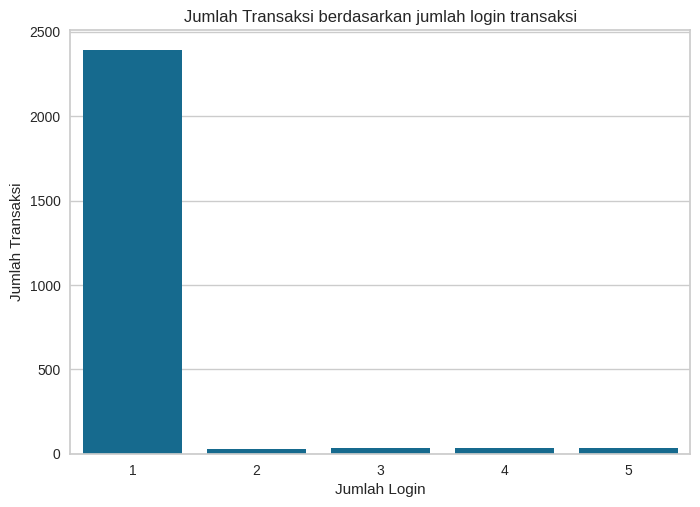

In [ ]:
transaction_counts = bank_transaction_df['LoginAttempts'].value_counts()

sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Jumlah Transaksi berdasarkan jumlah login transaksi')
plt.xlabel('Jumlah Login')
plt.ylabel('Jumlah Transaksi')
plt.show()

Kode tersebut akan menghasilkan visualisasi yang menunjukkan jumlah transaksi berdasarkan jumlah percobaan login yang dilakukan oleh pengguna. Tampak bahwa beberapa transaksi yang melakukan pencobaan login berkali-kali yang mana ini dapat menjadi tanda penipuan (fraud).

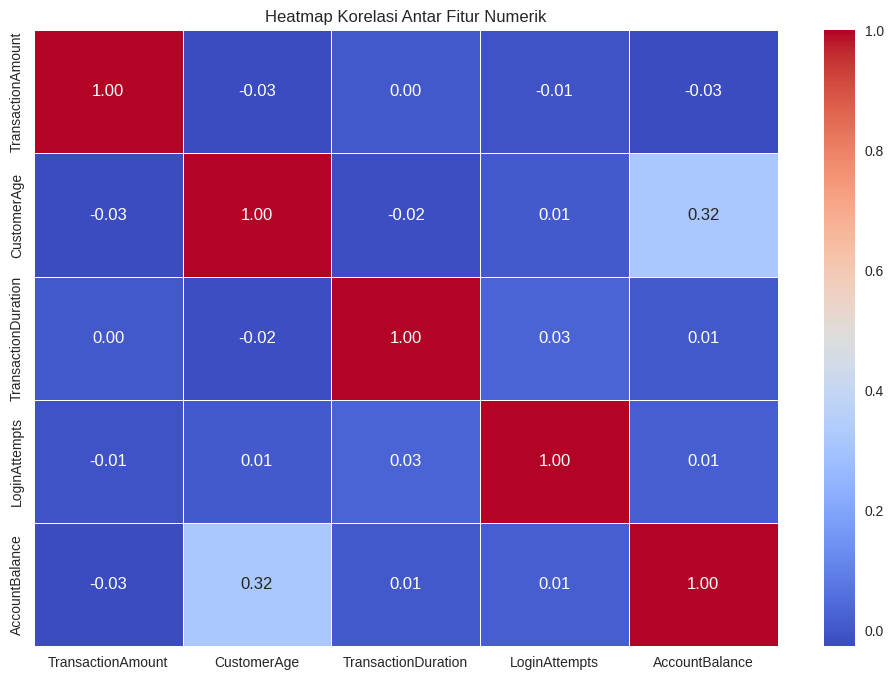

In [ ]:
correlation_matrix = bank_transaction_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

Kode tersebut menghasilkan Heatmap yang menunjukkan korelasi antara setiap fitur numerik dalam dataset. Terlihat bahwa hubungan antar fitur memiliki nilai korelasi yang tergolong rendah. Ini berarti setiap fitur saling independen. Hal ini bagus karena memberikan informasi unik.

Korelasi tertinggi yaitu antar fitur AccountBalance dan CustomerAge yang mana hal ini mungkin karena pelanggan lebih tua bisa jadi lebih mapan finansial.

Hal ini juga menunjukkan tidak adanya multikolinearistas sehingga tidak perlu melakukan drop pada fitur-fitur numerik untuk saat ini.

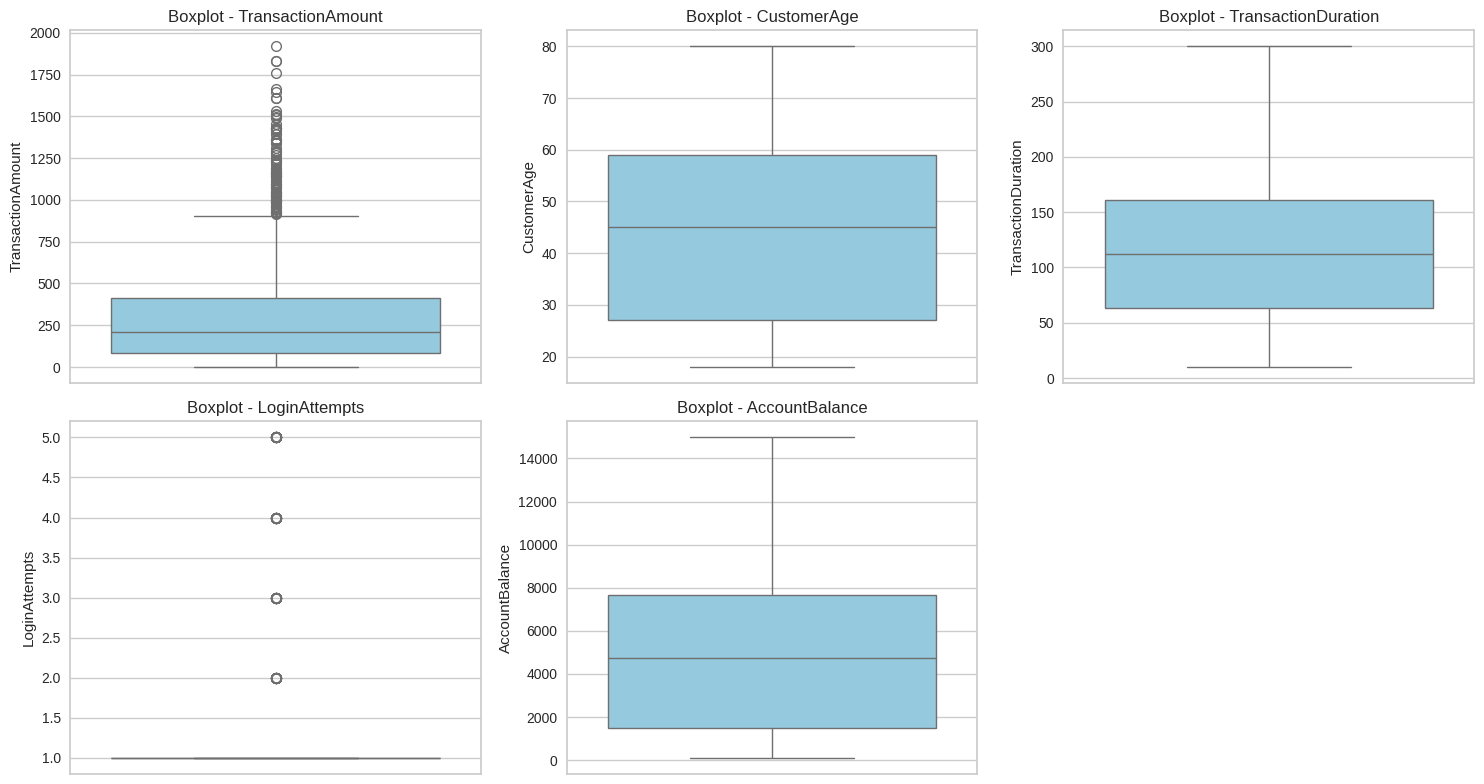

In [ ]:
# Membuat Boxplot untuk mendeteksi outlier
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=bank_transaction_df, y=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.show()

Kode tersebut akan menghasilkan visualisasi Boxplot yang menunjukkan outlier pada data. Pada kolom TransactionAmount tampak begitu banyak outlier disisi atas (outlier dengan nilai tinggi). Transaksi tinggi bisa jadi anomali (mungkin penipuan atau bisa saja transaksi bisnis besar).

Boxplot LoginAttempts tampak memiliki outlier karena hampir semua bernilai 1 sedangkan outlier bernilai 2,3,4, dan 5. Percobaan login berulang bisa jadi sinyal perilaku mencurigakan.

Fitur numerik lainnya tampak tidak memiliki nilai outlier namun beberap memiliki distribusi yang cukup lebar sehingga dapat melakukan scaling.

# **5. Data Preprocessing**

Pada tahap ini akan dilakukan data preprocessing. Data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang dilakukan:

1. Memilih fitur yang relevan
2. Encoding Data Kategorikal
3. Deteksi dan Penanganan Outlier
4. Normalisasi atau Standarisasi Fitur


In [ ]:
df_preprocessed = bank_transaction_df.copy()
df_preprocessed.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# 1. Memilih fitur yang relevan
num_features = ['TransactionAmount', 'CustomerAge','TransactionDuration', 'LoginAttempts',  'AccountBalance']
cat_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

X_num = df_preprocessed[num_features]
X_cat = df_preprocessed[cat_features]

Dalam tahap pemilihan fitur, fitur dengan terlalu banyak nilai unik dan tanpa pola yang jelas dieliminasi. Fitur yang dipilih dipisahkan ke dalam dua dataframe: satu untuk data kategorikal yang akan diencoding dan satu lagi untuk data numerik yang akan distandarisasi.

In [ ]:
#  2. Encoding Data Kategorikal

In [ ]:
X_cat['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [ ]:
X_cat['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [ ]:
print(X_cat['Location'].value_counts())

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      55
Phoenix             55
Milwaukee           55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

In [ ]:
X_cat['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [ ]:
X_cat['CustomerOccupation'].unique()

array(['Doctor', 'Student', 'Retired', 'Engineer'], dtype=object)

In [ ]:
print(X_cat.columns)

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')


In [ ]:
X_cat = pd.get_dummies(X_cat[['TransactionType', 'Channel', 'CustomerOccupation']], drop_first=True)
X_cat['Location'] = df_preprocessed['Location'].map(df_preprocessed['Location'].value_counts())
X_cat.head()

,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Location
0,True,False,False,False,False,False,59
1,True,False,False,False,False,False,63
2,True,False,True,False,False,True,61
3,True,False,True,False,False,True,59
4,False,False,True,False,False,True,61


Sebelum encoding data kategorikal, dilakukan analisis pola dan distribusi untuk menentukan metode encoding yang tepat. Kolom 'TransactionType', 'Channel', dan 'CustomerOccupation' memiliki sedikit nilai unik, sehingga cocok untuk Dummy Encoding tanpa membebani komputasi. Sementara itu, kolom 'Location' memiliki banyak nilai unik, yang dapat meningkatkan dimensi data secara signifikan. Oleh karena itu, Frequency Encoding dipilih sebagai solusi yang lebih efisien.

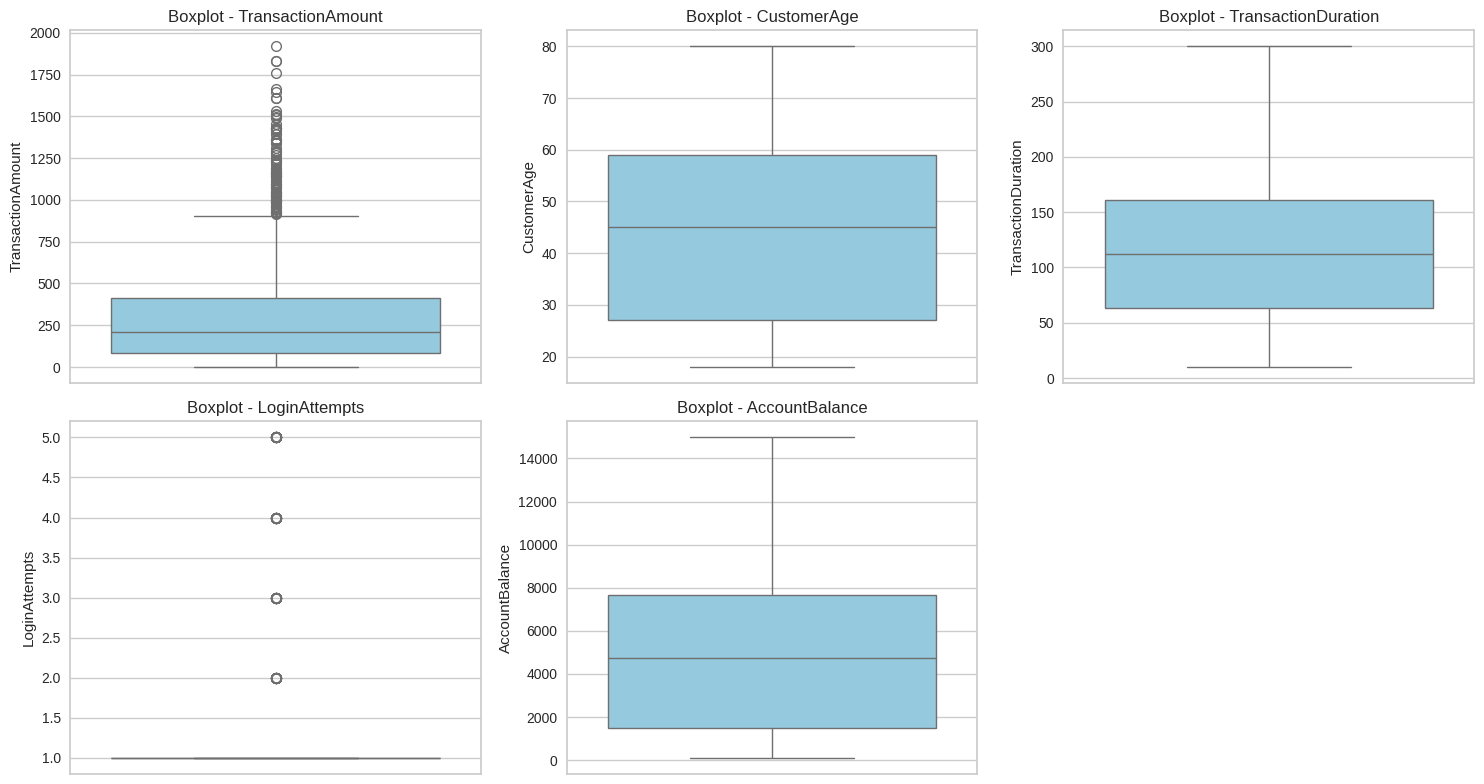

In [ ]:
# 3. Deteksi dan Penanganan Outlier
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=X_num, y=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.show()

Terdapat outlier pada fitur TransactionAmount dan LoginAttempts. Sebenarnya hal ini wajar dan bahkan dapat menjadi indikator penanda terjadinya penipuan(fraud). Sehingga saya memutuskan untuk membiarkan kedua fitur tersebut tetap memiliki outlier.
Untuk fitur numerik lainnya seperti CustomerAge, TransactionDuration, dan AccountBalance tidak terdeteksi adanya outlier.

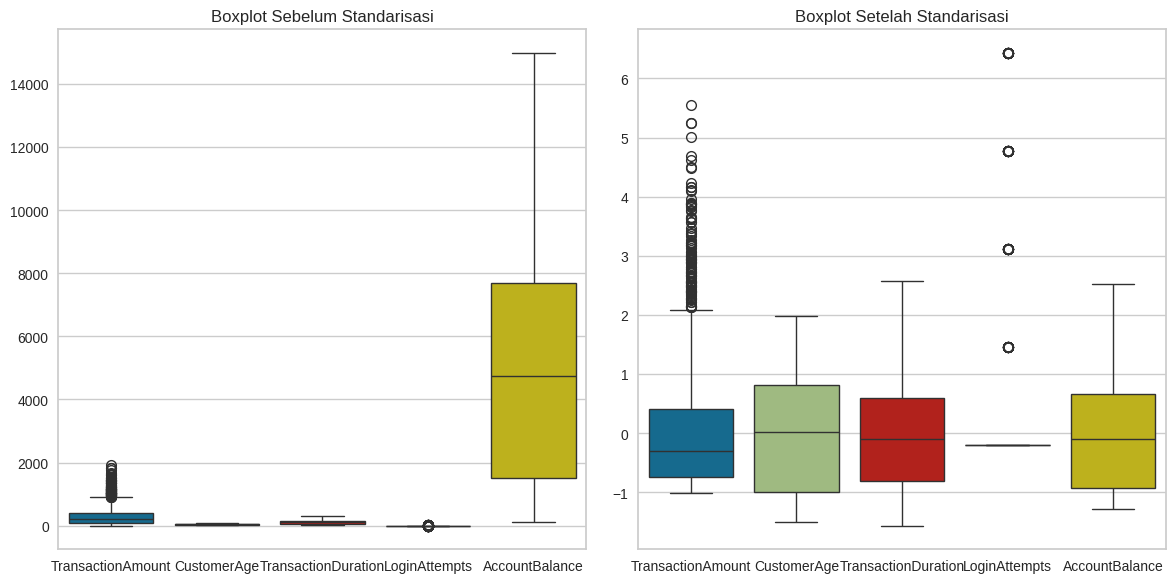

In [ ]:
# 4. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

# boxplot untuk data sebelum dan sesudah standarisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_num)
plt.title("Boxplot Sebelum Standarisasi")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_num_scaled)
plt.title("Boxplot Setelah Standarisasi")

plt.tight_layout()
plt.show()


Kode ini melakukan standarisasi pada fitur numerik menggunakan StandardScaler. Proses ini memastikan bahwa semua fitur memiliki skala yang sama dengan mean 0 dan standar deviasi 1, sehingga model dapat bekerja lebih optimal.
Setelah standarisasi, dilakukan visualisasi menggunakan boxplot untuk membandingkan distribusi data sebelum dan sesudah standarisasi.

In [ ]:
# Hasil preprocessing disimpan dalam df_processed
df_processed = pd.concat([X_num_scaled, X_cat], axis=1)
df_processed.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Location
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,True,False,False,False,False,False,59
1,0.269440,1.311287,0.305314,-0.206794,2.216472,True,False,False,False,False,False,63
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,True,False,True,False,False,True,61
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,True,False,True,False,False,True,59
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,False,False,True,False,False,True,61


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini dilakukan pembangunan model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah tahapannya.
1. Pilih algoritma clustering yang sesuai (yaitu KMeans).
2. Latih model dengan data (menggunakan algoritma KMeans).

In [ ]:
# Buat model KMeans
kmeans_final = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans_final.fit_predict(df_processed)

# Tambahkan hasil klaster ke dataframe
df_processed['Cluster'] = cluster_labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

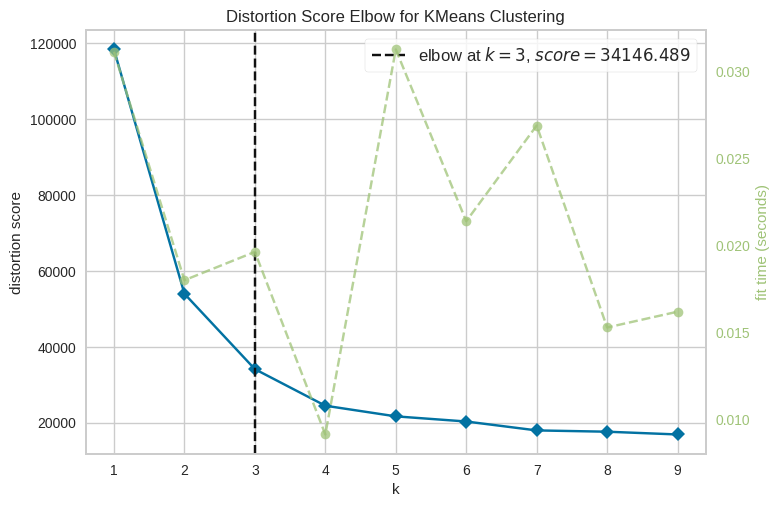

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_processed)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Buat model KMeans
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_final.fit_predict(df_processed)

# Tambahkan hasil klaster ke dataframe
df_processed['Cluster'] = cluster_labels

In [ ]:
# Hitung Silhouette Score
score = silhouette_score(df_processed, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2666


saya menghadapi tantangan khusus karena dataset yang saya gunakan berkaitan dengan deteksi fraud dalam transaksi bank. Salah satu karakteristik utama dari data fraud adalah adanya outlier, yang justru menjadi indikator penting dalam mendeteksi anomali transaksi. Menghilangkan outlier dari dataset saya dapat meningkatkan Silhouette Score, tetapi hal ini justru akan mengurangi kualitas analisis dalam mendeteksi transaksi yang mencurigakan.
Saya sudah berusaha untuk meningkatkan silhouette score dengan berbagai pendekatan seperti seleksi fitur yang memilki pengaruh terhadap hasil clusterbaik untuk fitur numerik maupun kategorikal. Selain itu saya mencoba untuk melakukan parameter tuning untuk menentukan jumlah kluster terbaik dengan silhouette score yang lebih tinggi.

## **c. Feature Selection (Opsional)**

Tahap selanjutnya adalah melakukan feature selection untuk optimasi model clustering.

In [ ]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = df_processed.drop(['TransactionType_Debit',	'Channel_Branch',	'Channel_Online',	'CustomerOccupation_Engineer',	'CustomerOccupation_Retired',	'CustomerOccupation_Student',	'Location',	'Cluster'], axis=1)
# X_integer = df_preprocessed.drop(['TransactionType',	'Channel',	'CustomerOccupation',	'Location'], axis=1)

X_integer['Cluster'] = kmeans.labels_
rf_model.fit(X_integer.drop('Cluster', axis=1), X_integer['Cluster'])
# rf_model.fit(X_integer, cluster)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = np.percentile(importances, 50)  # Ambil threshold dari 75% percentile

# threshold = 0.20  # Misalnya, ambang batas 20%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X_integer.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_integer.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]  # Hanya fitur penting dari data pelatihan

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
TransactionAmount: 0.2494654353845158
TransactionDuration: 0.23402140592861168
AccountBalance: 0.27738614022605457

Dimensi data pelatihan dengan fitur penting: (2512, 3)


Seleksi fitur diatas dilakukan menggunakan Embedded Method pada data numerik dan hasil clustering dari algoritma KMeans. Hasilnya menunjukkan bahwa TransactionAmount, TransactionDuration, dan AccountBalance adalah fitur utama yang berpengaruh terhadap target.

Sementara itu, fitur CustomerAge dan LoginAttempt dapat dieliminasi. Namun, LoginAttempt tetap dipertahankan karena jumlah percobaan login dapat menjadi indikator potensial adanya fraud.

In [ ]:
X_categorical_encoded = df_processed.drop(['TransactionAmount',	'CustomerAge',	'TransactionDuration',	'LoginAttempts',	'AccountBalance', 'Cluster'], axis=1)
X_integer['Cluster'] = kmeans.labels_

# Hitung nilai Chi-Square
chi2_scores, p_values = chi2(X_categorical_encoded, X_integer['Cluster'])

# Buat DataFrame untuk melihat hasilnya
chi2_results = pd.DataFrame({"Fitur": X_categorical_encoded.columns, "Chi2 Score": chi2_scores, "P-Value": p_values})
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

# Menampilkan hasil fitur penting
print(chi2_results)

                         Fitur   Chi2 Score        P-Value
6                     Location  1677.638584   0.000000e+00
5   CustomerOccupation_Student   780.490169  3.295468e-163
4   CustomerOccupation_Retired   166.302284   7.675947e-32
3  CustomerOccupation_Engineer    39.509326   3.953351e-06
2               Channel_Online     5.847592   6.642992e-01
1               Channel_Branch     3.895163   8.664561e-01
0        TransactionType_Debit     1.271024   9.958894e-01


In [ ]:
# Drop fitur yang telah dieliminasi pada tahap feature selection
df_selected = df_processed.drop(['CustomerAge', 'Channel_Online',	'Channel_Branch',	'TransactionType_Debit', 'Cluster'], axis=1)

Seleksi fitur dilakukan menggunakan Chi-Square pada data kategorikal dan hasil clustering dari algoritma KMeans. Chi-Square digunakan untuk mengukur hubungan antara fitur kategorikal dengan target, sehingga fitur dengan nilai Chi-score tertinggi dianggap memiliki pengaruh lebih besar terhadap target.

Hasilnya menunjukkan bahwa Location, CustomerOccupation_Student, CustomerOccupation_Retired, dan CustomerOccupation_Engineer memiliki nilai Chi-score tertinggi, sehingga dipilih sebagai fitur penting.

Sementara itu, fitur Channel_Online, Channel_Branch, dan TransactionType_Debit memiliki nilai Chi-score yang rendah, yang menunjukkan bahwa fitur ini memiliki hubungan yang lemah dengan target, sehingga dapat dieliminasi untuk meningkatkan efisiensi model.

In [ ]:
df_selected_pt = df_processed.drop(['CustomerAge', 'Channel_Online',	'Channel_Branch',	'TransactionType_Debit',	'AccountBalance', 'Cluster'], axis=1)

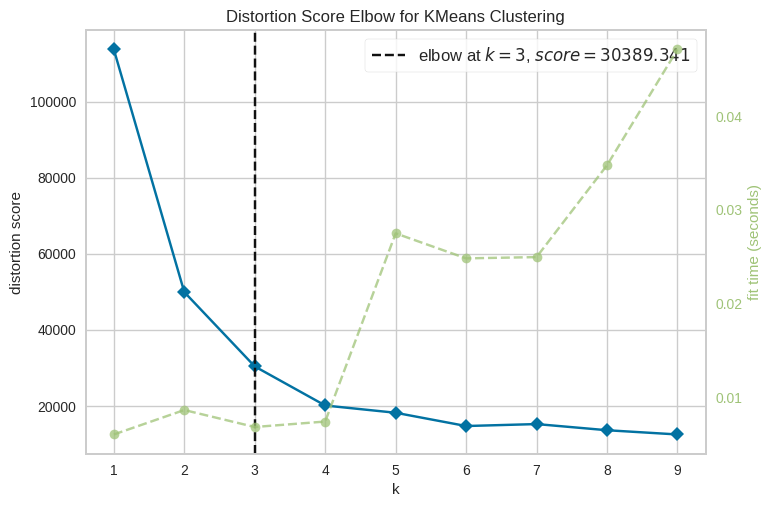

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Evaluasi hasil seleksi Fitur dengan Elbow Method dan Silhouette Score
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Buat model KMeans
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_final.fit_predict(df_selected)

# Tambahkan hasil klaster ke dataframe
df_selected['Cluster'] = cluster_labels

In [ ]:
score = silhouette_score(df_selected, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.4603


In [ ]:
# Daftar jumlah klaster yang ingin diuji
cluster_range = range(2, 11)  # Coba dari 2 hingga 10 klaster
best_score = -1
best_k = None
best_model = None

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=42)
    cluster_labels = kmeans.fit_predict(df_selected_pt)  # X_processed adalah data yang sudah diproses

    # Hitung silhouette score
    score = silhouette_score(df_selected_pt, cluster_labels)

    print(f"Jumlah Klaster: {k}, Silhouette Score: {score:.4f}")

    # Simpan model dengan silhouette score terbaik
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

print(f"\nKlaster terbaik: {best_k} dengan Silhouette Score: {best_score:.4f}")

Jumlah Klaster: 2, Silhouette Score: 0.5199
Jumlah Klaster: 3, Silhouette Score: 0.4713
Jumlah Klaster: 4, Silhouette Score: 0.3822
Jumlah Klaster: 5, Silhouette Score: 0.3773
Jumlah Klaster: 6, Silhouette Score: 0.3881
Jumlah Klaster: 7, Silhouette Score: 0.3985
Jumlah Klaster: 8, Silhouette Score: 0.3143
Jumlah Klaster: 9, Silhouette Score: 0.2712
Jumlah Klaster: 10, Silhouette Score: 0.2846

Klaster terbaik: 2 dengan Silhouette Score: 0.5199


Dari hasil parameter tuning, silhouette score terbaik diperoleh pada K = 2, yang menunjukkan bahwa pembagian cluster pada K = 2 memiliki pemisahan yang lebih jelas antar kelompok. Namun, berdasarkan Elbow Method, jumlah cluster optimal adalah K = 3, yang menunjukkan titik keseimbangan antara jumlah cluster dan varians dalam data.

Dari pertimbangan ini, diputuskan untuk menggunakan K = 3 karena memberikan keseimbangan yang lebih baik antara pemisahan antar cluster dan variasi dalam data. Dengan K = 3, setiap cluster dapat mewakili karakteristik yang lebih spesifik dalam dataset, yang lebih sesuai untuk analisis lebih lanjut, terutama dalam tahap klasifikasi untuk mendeteksi fraud.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi dengan 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


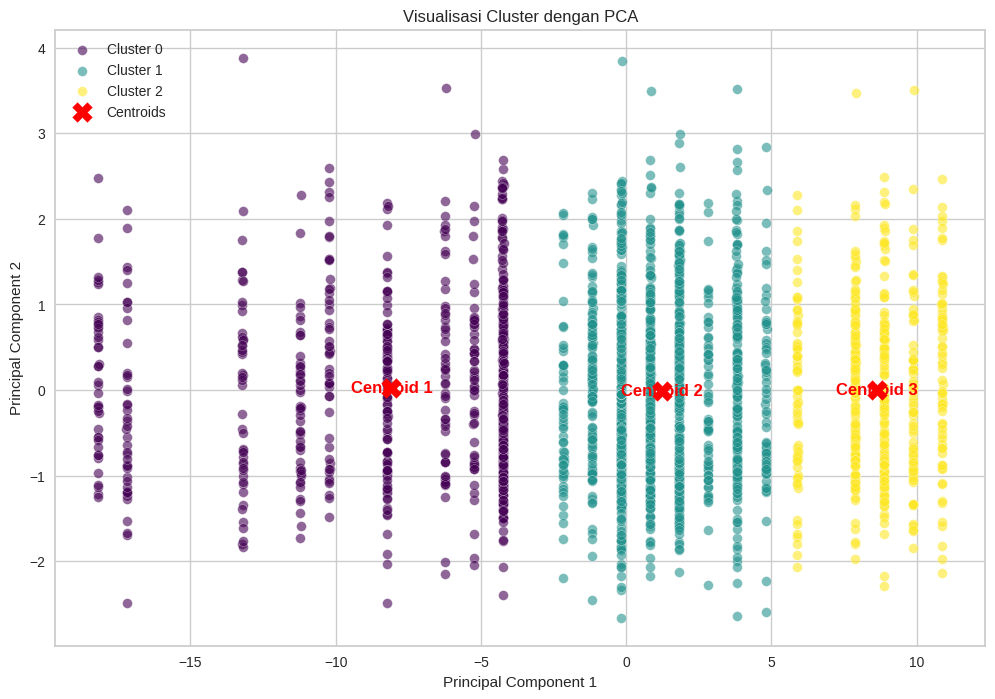

In [ ]:
# Mengubah data menjadi 2 dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_selected)

# Ambil hasil label clustering
cluster_labels = kmeans_final.fit_predict(df_selected)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

# Warna untuk setiap cluster
unique_labels = np.unique(cluster_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(12, 8))

# Plot setiap cluster dengan warna berbeda
for label, color in zip(unique_labels, colors):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1],
                color=color, label=f'Cluster {label}', alpha=0.6, edgecolors='w', s=50)

# Plot centroid setelah transformasi PCA
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker="X", label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center', fontweight='bold')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Tahap Inverse Transform tidak dapat dilakukan pada hasil clustering karena penggunaan dummy encoding, di mana satu fitur dari one-hot encoding dihapus. Hal ini menyebabkan informasi awal tidak lengkap, sehingga sulit dikembalikan ke bentuk aslinya.

Sebagai solusinya, data yang belum melalui encoding atau standarisasi telah disimpan dalam dataframe terpisah. Dengan demikian, hasil clustering dapat langsung digabungkan dengan data asli tanpa mengubah posisi atau jumlah baris, sehingga tetap konsisten dan aman untuk analisis lebih lanjut.

In [ ]:
df_final = df_preprocessed.copy()
df_final['Cluster'] = df_selected['Cluster']

In [ ]:
df_final.sample(20)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
118,TX000119,AC00085,407.65,2023-07-07 16:11:38,Debit,Boston,D000544,98.255.160.110,M041,Online,26,Engineer,62,1,8346.64,2024-11-04 08:06:30,1
367,TX000368,AC00087,43.85,2023-03-13 16:25:34,Debit,Fresno,D000092,117.67.192.211,M013,ATM,62,Retired,122,1,4356.98,2024-11-04 08:07:18,1
912,TX000913,AC00179,213.40,2023-08-14 16:40:38,Credit,Fort Worth,D000203,198.73.211.114,M087,Branch,73,Retired,100,1,2012.24,2024-11-04 08:09:27,2
1279,TX001280,AC00373,146.15,2023-01-06 17:52:11,Debit,Phoenix,D000640,60.166.231.236,M098,Branch,43,Doctor,75,1,13784.40,2024-11-04 08:06:59,0
346,TX000347,AC00375,147.40,2023-06-09 16:10:51,Debit,San Jose,D000283,92.214.76.157,M067,Branch,42,Engineer,259,1,6797.71,2024-11-04 08:07:18,1
349,TX000350,AC00029,11.18,2023-02-27 16:39:28,Debit,Miami,D000609,176.96.83.253,M035,ATM,53,Engineer,144,1,7467.30,2024-11-04 08:10:57,1
388,TX000389,AC00279,99.36,2023-05-09 16:55:54,Debit,Seattle,D000019,93.151.52.152,M004,ATM,40,Doctor,46,1,1272.12,2024-11-04 08:09:15,1
638,TX000639,AC00416,655.15,2023-01-02 16:22:54,Debit,Seattle,D000626,11.167.243.171,M083,ATM,26,Engineer,264,1,5587.44,2024-11-04 08:07:15,1
575,TX000576,AC00013,33.46,2023-02-20 16:52:03,Debit,Seattle,D000617,189.248.139.91,M003,ATM,72,Retired,111,1,3641.07,2024-11-04 08:09:12,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
numeric_columns = df_final.select_dtypes(include=['number']).columns
aggregated = df_final[numeric_columns].groupby('Cluster').agg(['mean', 'median', 'min', 'max', 'std'])
print(aggregated)

        TransactionAmount                                     CustomerAge  \
                     mean   median   min      max         std        mean   
Cluster                                                                     
0              296.231451  205.105  1.41  1919.11  299.539943   45.364789   
1              300.486913  215.595  0.32  1830.00  289.400774   44.703313   
2              291.528734  202.760  0.26  1612.37  288.008376   43.556962   

                                   ... LoginAttempts                           \
        median min max        std  ...          mean median min max       std   
Cluster                            ...                                          
0         46.5  18  80  17.758231  ...      1.109859    1.0   1   5  0.551228   
1         45.0  18  80  17.917064  ...      1.122741    1.0   1   5  0.600799   
2         43.5  18  80  17.470904  ...      1.151899    1.0   1   5  0.677427   

        AccountBalance                            

In [ ]:
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Menghitung distribusi kategori utk setiap cluster
for col in categorical_columns:
    print(f"Distribusi {col} per Cluster:")
    print(df_final.groupby('Cluster')[col].value_counts(normalize=True) * 100)
    print("\n")

Distribusi TransactionType per Cluster:
Cluster  TransactionType
0        Debit              77.183099
         Credit             22.816901
1        Debit              77.033133
         Credit             22.966867
2        Debit              78.691983
         Credit             21.308017
Name: proportion, dtype: float64


Distribusi Location per Cluster:
Cluster  Location        
0        Las Vegas            7.746479
         Milwaukee            7.746479
         Nashville            7.746479
         Phoenix              7.746479
         Virginia Beach       7.746479
         Columbus             7.605634
         Sacramento           7.464789
         Baltimore            7.183099
         Louisville           7.183099
         Dallas               6.901408
         Washington           6.760563
         El Paso              6.478873
         Portland             5.915493
         Albuquerque          5.774648
1        Miami                4.819277
         Detroit            

# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Transaksi**: 296,231.45
- **Rata-rata Usia Pelanggan**: 45.36 tahun
- **Rata-rata Percobaan Login**: 1.1 kali
- **Rata-rata Saldo Rekening**: 5,304.20

- **Analisis:**
 Cluster ini menunjukkan pelanggan dengan usia rata-rata yang lebih tua serta jumlah transaksi yang relatif stabil dengan saldo rekening cukup tinggi. Dengan jumlah percobaan login yang rendah (sekitar 1 kali), pelanggan dalam cluster ini kemungkinan adalah pengguna yang sah dengan pola transaksi yang normal dan risiko fraud yang rendah.

 Berdasarkan hasil distribusi data kategorical pada cluster 0 terlihat bahwa sebaran lokasi merata, jenis pekerjaan seimbang, distribusi transaksi berdasarkan jenisnya cluster ini cenderung menggunakan kredit dibanding cluster lainnya.

## Cluster 1:
- **Rata-rata Transaksi**: 300,486.91
- **Rata-rata Usia Pelanggan**: 44.70 tahun
- **Rata-rata Percobaan Login**: 1.12 kali
- **Rata-rata Saldo Rekening**: 5,069.80

- **Analisis:**
 Cluster ini memiliki karakteristik yang mirip dengan Cluster 0, dengan rata-rata transaksi sedikit lebih tinggi dan saldo rekening yang juga cukup besar. Namun, jumlah percobaan login masih tergolong normal. Cluster ini juga kemungkinan besar berisi pelanggan yang sah dengan pola transaksi yang dapat diprediksi.

 Berdasarkan hasil distribusi data kategorical pada cluster 1 terlihat bahwa sebaran lokasi yang luas dengan proporsi yang kecil perkota, lebih banyak student dibandingkan engineers dan kebiasaan transaksinya mirip dengan cluster 0.


## Cluster 2:
- **Rata-rata Transaksi**: 291,528.73
- **Rata-rata Usia Pelanggan**: 43.55 tahun
- **Rata-rata Percobaan Login**: 1.15 kali
- **Rata-rata Saldo Rekening**: 4,954.53

- **Analisis:**
 Cluster ini memiliki transaksi dengan nilai rata-rata lebih rendah dibandingkan dengan dua cluster sebelumnya, dan saldo rekening yang juga lebih rendah. Meskipun perbedaan dalam percobaan login tidak signifikan, jika cluster ini memiliki lebih banyak kasus transaksi mencurigakan (misalnya banyak transaksi dengan nominal kecil dalam waktu singkat atau lonjakan aktivitas yang tidak biasa), maka kemungkinan besar cluster ini bisa berisi pelanggan dengan potensi fraud yang lebih tinggi.

 Berdasarkan hasil distribusi data kategorical pada cluster 2 terlihat bahwa sebaran lokasi lebih banyak dilakukan dikota besar, pekerjaan pengguna dengan proporsi terbanyak adalah pelajar, lebih sering menggunakan ATM dibanding Online atau branch untuk kanal transaksinya.


In [ ]:
label_mapping = {
    0: "Normal",
    1: "Normal",
    2: "Fraud"
}

df_final['Cluster'] = df_final['Cluster'].map(label_mapping)
df_final.sample(20)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
138,TX000139,AC00405,997.43,2023-11-22 16:07:19,Debit,Seattle,D000661,100.4.40.132,M067,Online,69,Doctor,118,1,6810.05,2024-11-04 08:08:25,Normal
1365,TX001366,AC00338,91.32,2023-11-10 16:43:45,Debit,Milwaukee,D000353,49.29.37.185,M056,Branch,58,Engineer,77,1,2618.10,2024-11-04 08:08:22,Normal
1637,TX001638,AC00041,348.44,2023-11-06 17:58:34,Debit,Baltimore,D000668,175.166.115.182,M034,Online,24,Student,147,1,1022.94,2024-11-04 08:09:55,Normal
2428,TX002429,AC00303,981.90,2023-11-28 16:17:46,Credit,Baltimore,D000686,160.65.101.37,M029,Online,43,Doctor,112,1,9018.33,2024-11-04 08:06:53,Normal
2413,TX002414,AC00019,489.31,2023-04-03 16:34:10,Debit,Louisville,D000293,156.235.3.171,M089,Branch,43,Engineer,36,1,5595.22,2024-11-04 08:12:22,Normal
2175,TX002176,AC00267,162.10,2023-12-06 17:34:01,Debit,Milwaukee,D000418,83.80.89.29,M078,Branch,41,Engineer,151,1,8576.65,2024-11-04 08:08:09,Normal
1887,TX001888,AC00206,74.11,2023-09-08 16:09:45,Credit,Virginia Beach,D000320,147.119.62.178,M065,Online,69,Retired,71,4,3920.11,2024-11-04 08:08:28,Normal
1169,TX001170,AC00477,724.18,2023-02-06 16:07:26,Debit,Fort Worth,D000144,104.155.121.252,M002,Branch,41,Doctor,134,1,10922.78,2024-11-04 08:08:21,Fraud
1329,TX001330,AC00110,224.28,2023-02-15 16:50:13,Debit,Chicago,D000316,189.20.224.220,M068,Online,64,Retired,68,1,5767.51,2024-11-04 08:10:52,Normal
2183,TX002184,AC00324,255.32,2023-09-13 16:14:04,Debit,Baltimore,D000652,47.167.178.158,M018,ATM,80,Retired,27,1,6290.62,2024-11-04 08:07:29,Normal


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_final.to_csv("clustering_bank_transaction.csv", index=False)